In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets,linear_model

In [4]:
from mpl_toolkits.mplot3d import axes3d

In [5]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm


In [6]:
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [9]:
print("Packages loaded")

Packages loaded


In [10]:
print("now time for action")

now time for action


In [11]:
import os 

In [12]:
os.chdir('E:\\01_2019_DS\\Datasets\\')

In [13]:
print(os.getcwd())

E:\01_2019_DS\Datasets


In [14]:
#reading the data using pandas.
data=pd.read_csv('diabetes2.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
import sklearn
array=data.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [18]:

X=array[:,0:8]#default:
y=array[:,8]
test_size=0.33

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size)
regr = skl_lm.LogisticRegression()

In [21]:
regr.fit(X_train,y_train)
pred=regr.predict(X_test)

C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print(X_test)

[[  3.     99.     80.    ...  19.3     0.284  30.   ]
 [  0.     84.     82.    ...  38.2     0.233  23.   ]
 [  1.      0.     48.    ...  24.7     0.14   22.   ]
 ...
 [  4.    129.     60.    ...  27.5     0.527  31.   ]
 [  1.     96.    122.    ...  22.4     0.207  27.   ]
 [  0.    123.     72.    ...  36.3     0.258  52.   ]]


In [23]:

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [24]:

cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, 
index=regr.classes_,columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'

In [25]:
print(cm_df)

True       0.0  1.0
Predicted          
0.0        156   43
1.0          8   47


In [26]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       164
         1.0       0.85      0.52      0.65        90

   micro avg       0.80      0.80      0.80       254
   macro avg       0.82      0.74      0.75       254
weighted avg       0.81      0.80      0.78       254



In [27]:
regr.score(X_test,y_test)

0.7992125984251969

In [28]:
diabetes=data


In [29]:
array=data.values

In [30]:
array=data.values
X=array[:,0:8]
y=array[:,8]

In [31]:
model=skl_lm.LogisticRegression()
def buildAndPredict(X,y,model):
     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,stratify=y)

In [34]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test,pred).T,index=regr.classes_,columns=model.classes_)

C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'

In [36]:
print(cm_df)

True       0.0  1.0
Predicted          
0.0        156   43
1.0          8   47


In [37]:
print(regr.score(X_test,y_test))

0.7992125984251969


In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
accuracy = cross_val_score(regr, X, y, cv = 10, scoring='accuracy').mean()

C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [42]:
print("Accuracy after cv{}".format(accuracy))

Accuracy after cv0.7669685577580314


In [46]:
#store the predictedc probablities
y_pred_prob=model.predict_proba(X_test)[:,1]

(array([31., 64., 65., 34., 20., 21.,  9., 10.]),
 array([0.0146857 , 0.1281337 , 0.24158169, 0.35502969, 0.46847769,
        0.58192568, 0.69537368, 0.80882167, 0.92226967]),
 <a list of 8 Patch objects>)

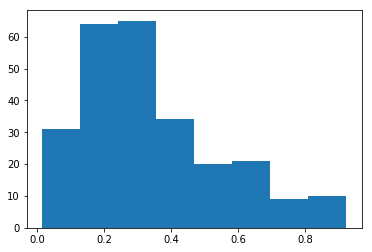

In [47]:
#now plotting the probability of become diabetic histogram
plt.hist(y_pred_prob, bins=8, linewidth=1.2)

(0, 1)

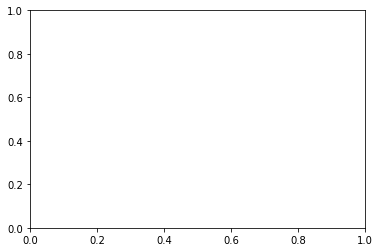

In [48]:
plt.xlim(0,1)

Text(0, 0.5, 'frequency')

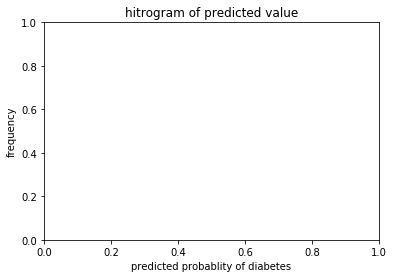

In [56]:
plt.title('hitrogram of predicted value')
plt.xlabel('predicted probablity of diabetes')
plt.ylabel('frequency')


In [58]:
#return(y_test,pred,y_pred_prob) error


In [63]:
# X_train, y_train, X_test, y_test = None

TypeError: cannot unpack non-iterable NoneType object

In [59]:
#y_test,pred,y_pred_prob=buildAndPredict(X,y,model)

TypeError: cannot unpack non-iterable NoneType object

In [61]:
#predict diabetes if the predicted value is probablity greater than 0.3
from sklearn.preprocessing import binarize
from sklearn.metrics import recall_score

In [86]:
def setThreshold(thr):
    y_pred_class=binarize([y_pred_prob],thr)[0]
    y_pred_class
    confusion_new = confusion_matrix(y_test,y_pred_class)
    print(confusion_new)
    TP = confusion_new[1, 1]
    TN = confusion_new[0, 0]
    FP = confusion_new[0, 1]
    FN = confusion_new[1, 0]
    #sensitivity has increased
    print("Sensitivity: ", TP / float(TP + FN))
    print(recall_score(y_test, y_pred_class))
    #calculate the specificity
    #for the new confusion matrix
    #previously it was0.90
    print("specifity:",TN/float(TN+FP))
setThreshold(0.3)
setThreshold(0.4)
setThreshold(0.5)

[[115  49]
 [ 15  75]]
Sensitivity:  0.8333333333333334
0.8333333333333334
specifity: 0.7012195121951219
[[148  16]
 [ 33  57]]
Sensitivity:  0.6333333333333333
0.6333333333333333
specifity: 0.9024390243902439
[[156   8]
 [ 43  47]]
Sensitivity:  0.5222222222222223
0.5222222222222223
specifity: 0.9512195121951219


In [74]:
#new confusion matrix(threshould=0.3)
y_pred_class=binarize([y_pred_prob])
y_pred_class


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


0.8630758807588076


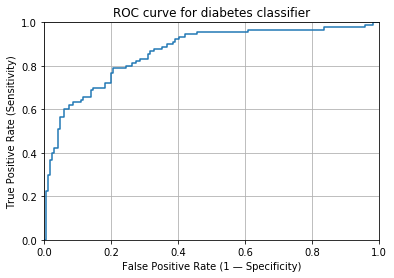

In [88]:
def draw_roc(y_test,y_pred_prob):
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlim(0.0,1.0)
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 — Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    print(roc_auc_score(y_test, y_pred_prob))
draw_roc(y_test,y_pred_prob)

In [91]:
#Also, the cross_val_score method, which is used to perform the K-fold cross validation method, comes with the option to pass roc_auc as the scoring parameter. Therefore, we can measure the AUC score using the cross validation procedure as well.



In [92]:
cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skrag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8246837606837607

In [93]:
#visuals below


In [94]:
get_ipython().magic('matplot inline')
sns.boxplot(data.Outcome,data.Glucose)

UsageError: Line magic function `%matplot` not found.


KeyError: "['BloodPressure '] not in index"

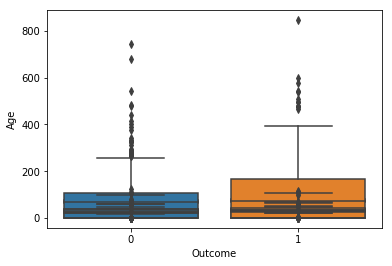

In [101]:
sns.boxplot(data.Outcome,data.BloodPressure)
sns.boxplot(data.Outcome,data.SkinThickness)
sns.boxplot(data.Outcome,data.Insulin)
sns.boxplot(data.Outcome,data.BMI)
sns.boxplot(data.Outcome,data.DiabetesPedigreeFunction)
sns.boxplot(data.Outcome,data.Age)
data_n=data[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure ','Outcome']]

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [98]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


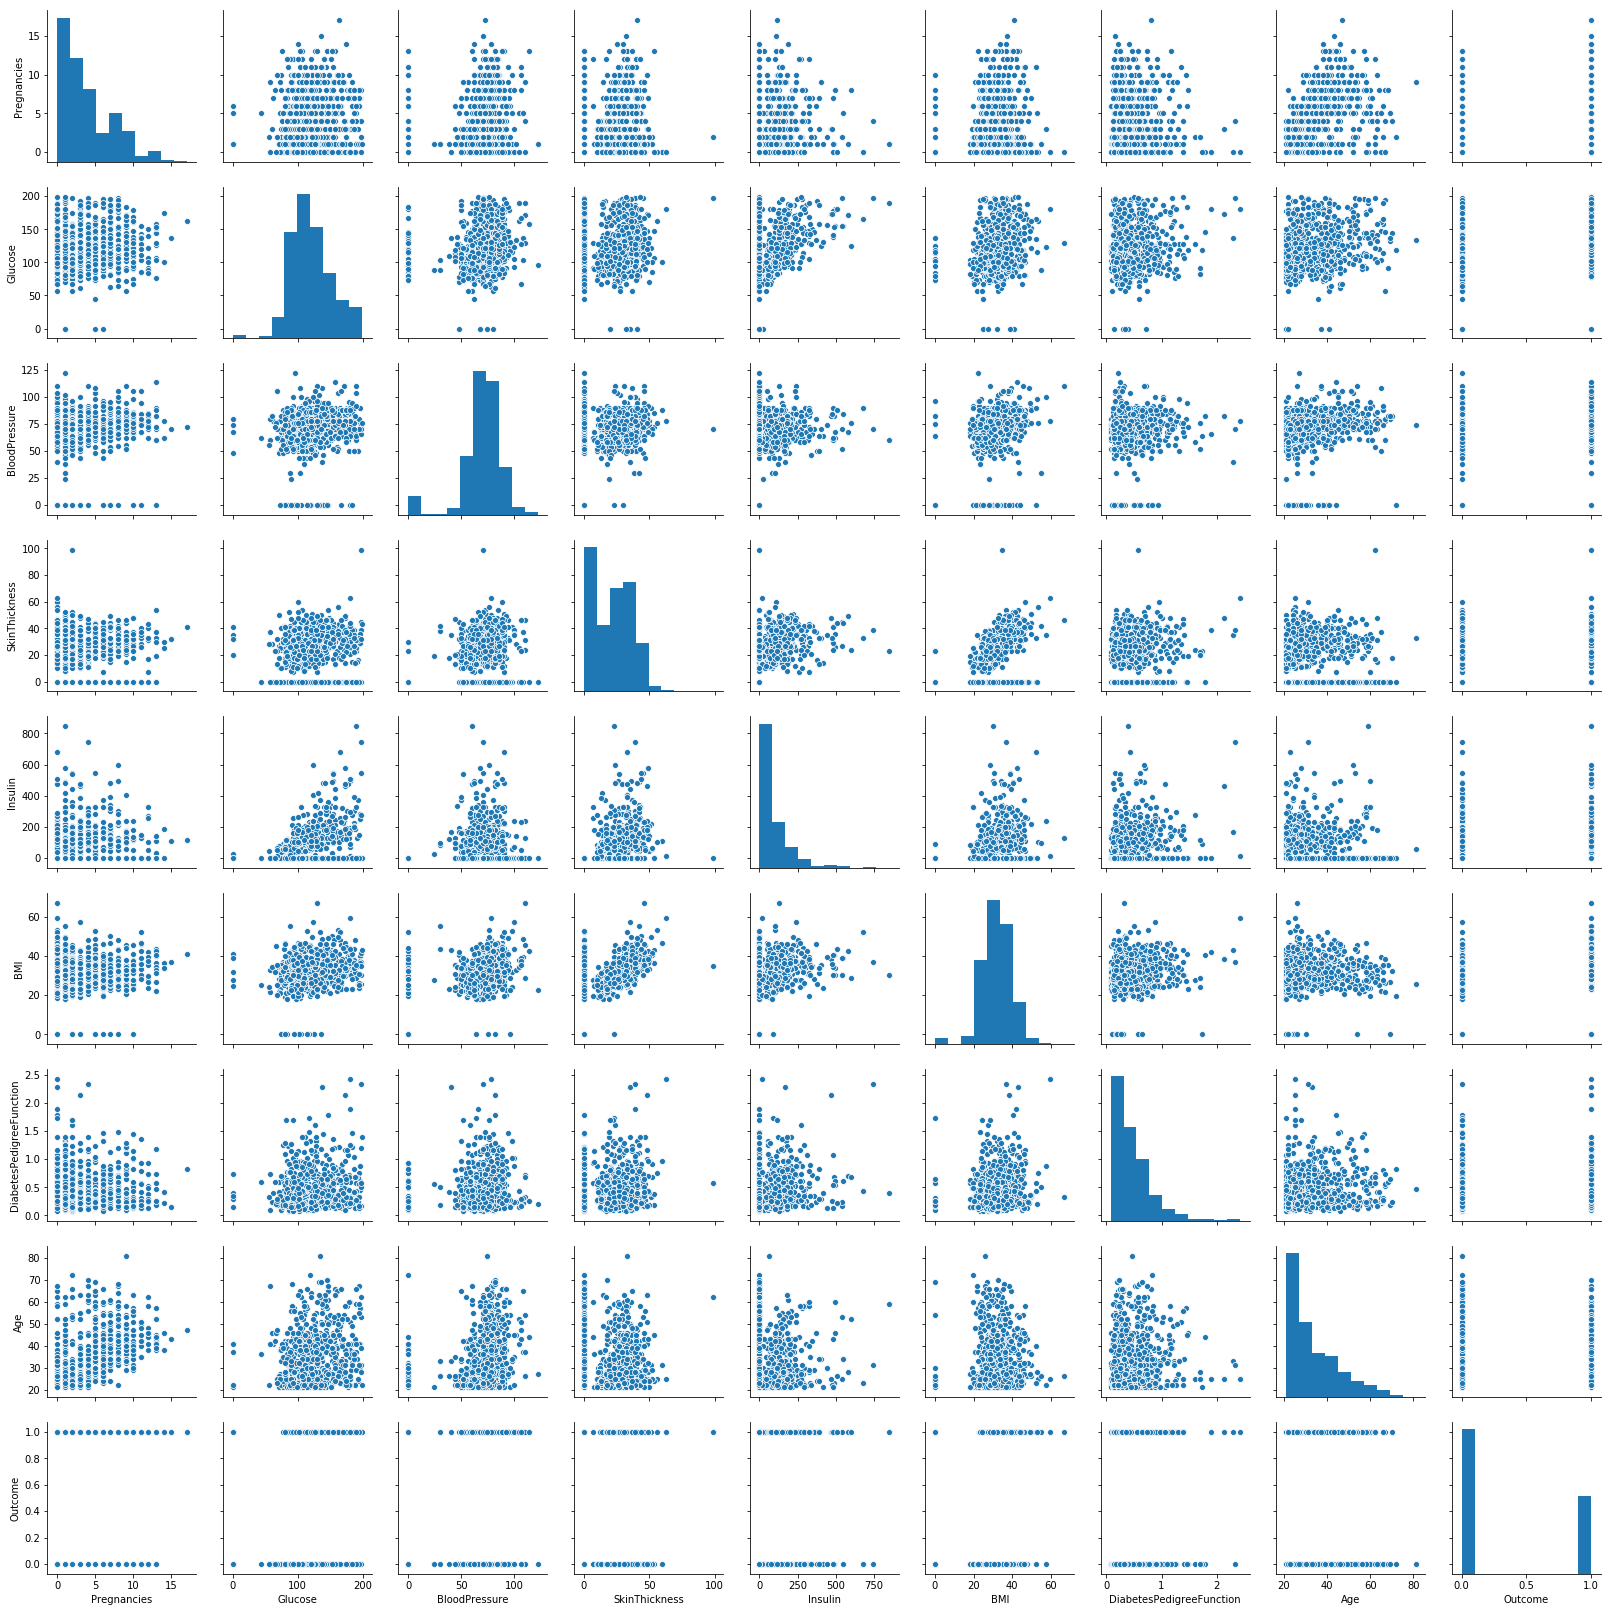

In [103]:
sns.pairplot(data)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

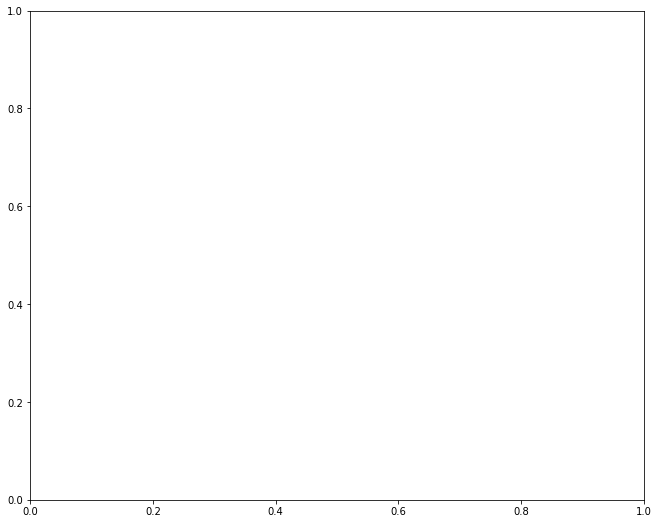

In [104]:
corr = data.corr() 
print(corr) 
print('-'*30)
mask = np.zeros_like(corr, dtype=np.bool)
print(mask)
print('-'*30)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(11, 9))


In [105]:
# Generate a custom diverging colormap

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)



Text(0.5, 1.05, 'Pearson Correlation of Features')

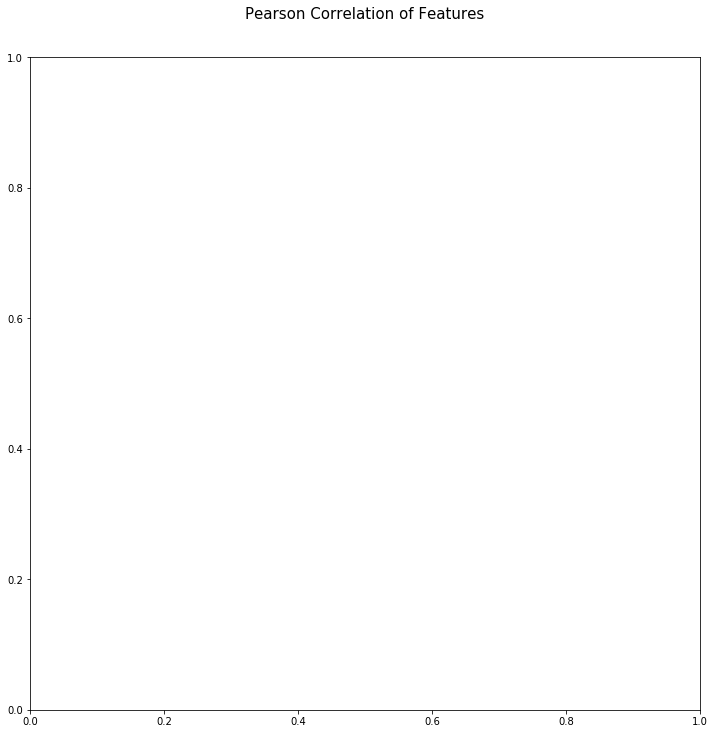

In [106]:
colormap = plt.cm.viridis 
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)


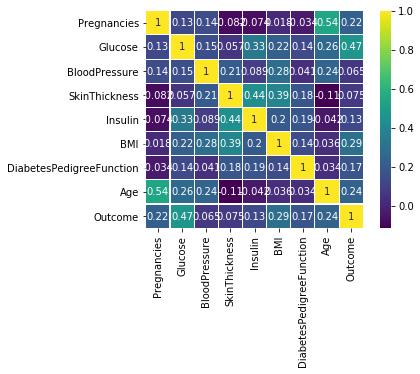

In [107]:
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)



In [108]:
data.describe()
truediabetes= data.loc[data['Outcome']==1]
truediabetes
len(truediabetes)
truediabetes.mean()
falsediabetes= data.loc[data['Outcome']==0]
len(falsediabetes)
falsediabetes.mean()




Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

In [109]:
%matplotlib inline

C:\Users\skrag\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\skrag\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


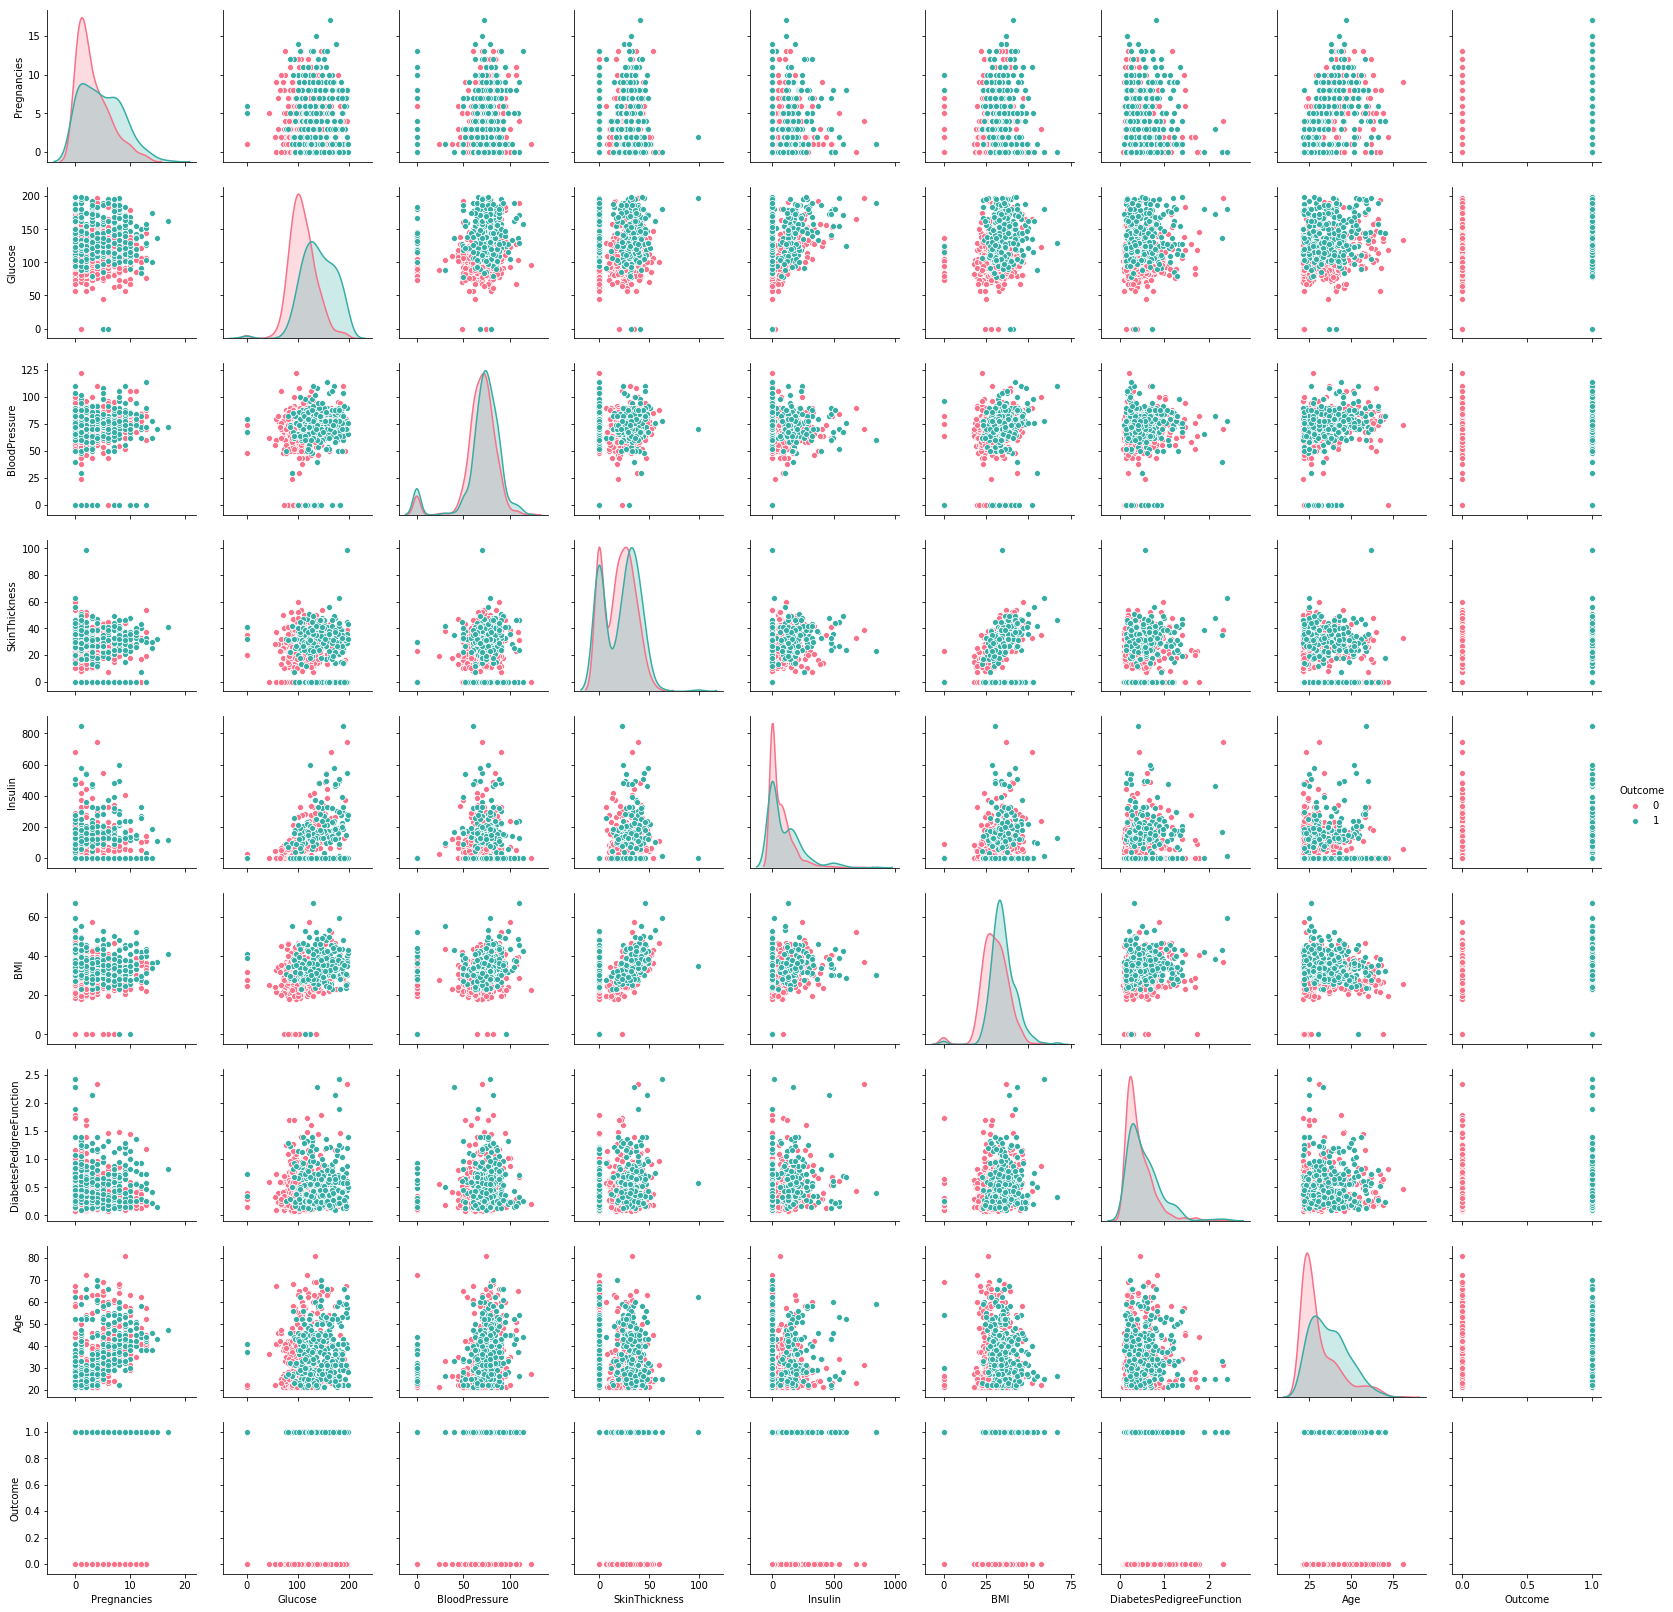

In [111]:
import matplotlib.pyplot as plt 
import seaborn as sb
sb.pairplot(data.dropna(), hue='Outcome', palette="husl")


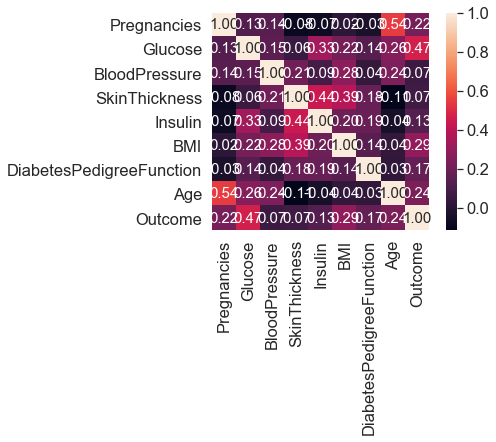

In [113]:
import numpy as np 
import seaborn as sns
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']
cm = np.corrcoef(data[cols].values.T) 
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()


<Figure size 1440x1440 with 0 Axes>

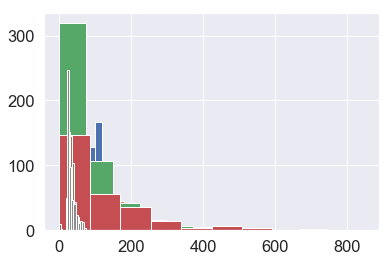

<Figure size 1440x1440 with 0 Axes>

In [114]:
data.loc[data['Outcome'] == 0, 'Glucose'].hist()
data.loc[data['Outcome']==1, 'Glucose'].hist()
data.loc[data['Outcome']==0,  'Insulin'].hist()
data.loc[data['Outcome']==1,  'Insulin'].hist()
data.loc[data['Outcome']==1,  'BMI'].hist()
data.loc[data['Outcome']==0,  'BMI'].hist()
data.loc[data['Outcome']==1,  'Age'].hist()
data.loc[data['Outcome']==0,  'Age'].hist()
plt.figure(figsize=(20, 20))

<Figure size 6408x6408 with 0 Axes>

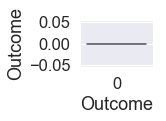

<Figure size 6408x6408 with 0 Axes>

In [116]:
for column_index, column in enumerate(falsediabetes.columns): 
    if column == 'Outcome':
        continue

plt.subplot(4, 4, column_index + 1) 
sb.violinplot(x='Outcome', y=column, data=falsediabetes)
plt.figure(figsize=(89, 89))

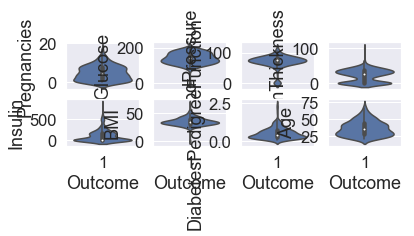

In [118]:
for column_index, column in enumerate(truediabetes.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1) 
    sb.violinplot(x='Outcome', y=column, data=truediabetes)


In [ ]:
#happily endeed